In [22]:
from math import sqrt
import params
import fn
import matplotlib.pyplot as plt

print(params.c_y_max)
print(params.c_y_min)
print(params.cy_cruise)
print(params.G_max)
print(params.G_min)
print(params.S_kr)


1.5
-0.31
0.3
465
310.0
3.86


In [24]:
n_y_max = 2.1 + 10900 / params.G_max + 4536
n_y_min = -0.4 * n_y_max
print(f' {params.c_y_max:.2f}')
print(f' {params.c_y_min:.2f}')


 1.50
 -0.31


In [28]:
# Розрахунок V_C
V_C = fn.calculate_V(params.G_max, params.rho_0, params.cy_cruise)

# Переведення в км/год
V_C_kmh = V_C * 3.6
# Перевірка числа Маха
M = V_C / params.msa[0]["sound_speed"]

print(f'V_C Розрахункова крейсерська швидкість = {V_C:.2f} м/с')
print(f'V_C = {V_C_kmh:.2f} км/год')
print(f'M = {M:.3f}')


V_C Розрахункова крейсерська швидкість = 80.18 м/с
V_C = 288.66 км/год
M = 0.236


In [31]:
P_dv = []
for a, c_y in params.alpha_cy.items():
    K = c_y / params.alpha_cx[a]
    P_dv.append({'alpha': a, 'P_dv': params.G_max / K})

print("Тяга двигуна для різних кутів атаки:")

for r in P_dv:
    print(f"Кут атаки α = {r['alpha']:3.0f} град, тяга двигуна P_дв = {r['P_dv']:8.3f} Н")

Тяга двигуна для різних кутів атаки:
Кут атаки α =  -4 град, тяга двигуна P_дв = -105.000 Н
Кут атаки α =  -2 град, тяга двигуна P_дв = -253.636 Н
Кут атаки α =   0 град, тяга двигуна P_дв =  232.500 Н
Кут атаки α =   2 град, тяга двигуна P_дв =   75.000 Н
Кут атаки α =   4 град, тяга двигуна P_дв =   54.706 Н
Кут атаки α =   6 град, тяга двигуна P_дв =   45.208 Н
Кут атаки α =   8 град, тяга двигуна P_дв =   40.000 Н
Кут атаки α =  10 град, тяга двигуна P_дв =   37.366 Н
Кут атаки α =  12 град, тяга двигуна P_дв =   39.651 Н
Кут атаки α =  14 град, тяга двигуна P_дв =   48.438 Н
Кут атаки α =  16 град, тяга двигуна P_дв =   52.700 Н
Кут атаки α =  18 град, тяга двигуна P_дв =   50.612 Н
Кут атаки α =  20 град, тяга двигуна P_дв =   41.333 Н


In [42]:
V_D = 1.25 * V_C
V_D_kmh = 1.25 * V_C_kmh
print(f'V_D Розрахункова швидкість пікірування = {V_D:.2f} м/с')
print(f'V_D Розрахункова швидкість пікірування = {V_D_kmh:.3f} км/г')

V_D Розрахункова швидкість пікірування = 100.23 м/с
V_D Розрахункова швидкість пікірування = 360.821 км/г


In [41]:
# Розрахунок характерних швидкостей
V_S = fn.calculate_V(params.G_max, params.rho_0, params.c_y_max)  # швидкість звалювання
V_A = V_S*sqrt(params.n_y_max)

print(f'V_S швидкість звалювання = {V_S:.2f} м/с')
print(f'V_S швидкість звалювання = {V_S*3.6:.3f} км/г')
print(f'V_A Розрахункова маневрена швидкість = {V_A:.2f} м/с')
print(f'V_A Розрахункова маневрена швидкість = {V_A*3.6:.3f}км/г')

V_S швидкість звалювання = 35.86 м/с
V_S швидкість звалювання = 129.091 км/г
V_A Розрахункова маневрена швидкість = 74.18 м/с
V_A Розрахункова маневрена швидкість = 267.053км/г


In [32]:
# Calculate speed for each angle of attack
results = []
#v_гп для різних кутів атаки
for alpha, cy in params.alpha_cy.items():
    if cy > 0:  # Only positive lift coefficients
        V = fn.calculate_V(params.G_max, params.rho_0, cy)
        V_kmh = V * 3.6
        M = V / params.sound_speed

        results.append({
            'alpha': alpha,
            'cy': cy,
            'V': V,
            'V_kmh': V_kmh,
            'M': M
        })

# Sort by speed ascending
results.sort(key=lambda x: x['V'])

# Print results
print(f"{'α (deg)':>8} {'cy':>8} {'V_гп (m/s)':>10} {'V_гп (km/h)':>10} {'M':>8}")
print("-" * 50)

for r in results:
    print(f"{r['alpha']:8.0f} {r['cy']:8.2f} {r['V']:10.2f} {r['V_kmh']:10.2f} {r['M']:8.3f}")

 α (deg)       cy V_гп (m/s) V_гп (km/h)        M
--------------------------------------------------
      16     1.50      35.86     129.09    0.105
      18     1.47      36.22     130.40    0.107
      14     1.44      36.60     131.75    0.108
      20     1.35      37.80     136.07    0.111
      12     1.29      38.67     139.20    0.114
      10     1.12      41.50     149.39    0.122
       8     0.93      45.54     163.95    0.134
       6     0.72      51.76     186.33    0.152
       4     0.51      61.50     221.39    0.181
       2     0.31      78.88     283.96    0.232
       0     0.10     138.88     499.97    0.408


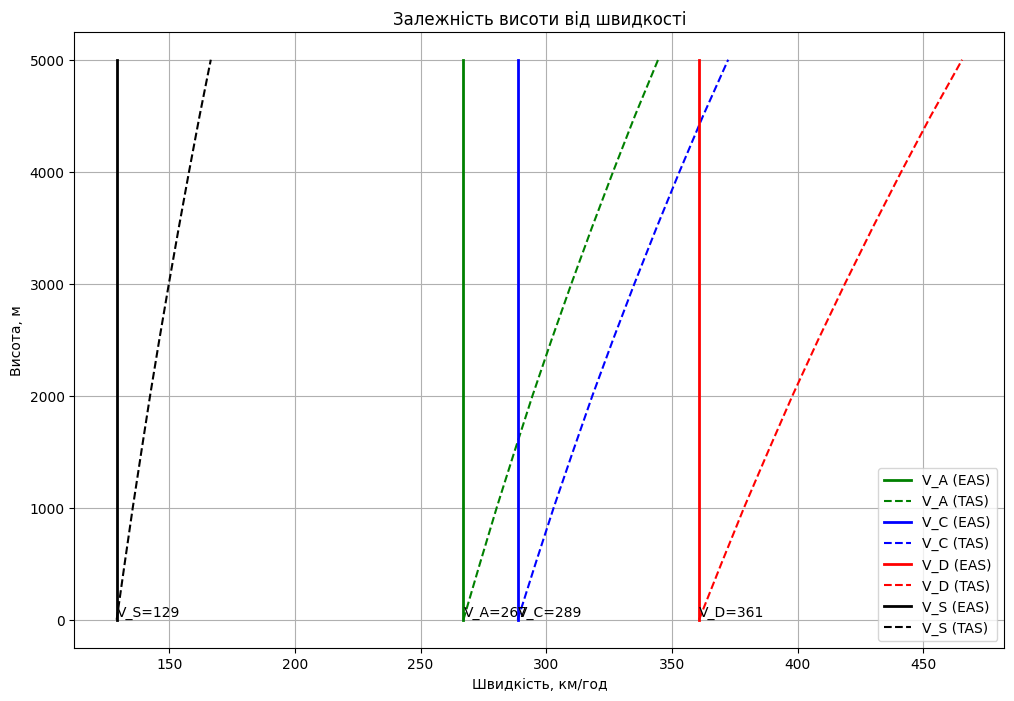

Характерні швидкості на H=0м:
V_S = 129.1 км/год
V_A = 267.1 км/год
V_C = 288.7 км/год
V_D = 360.8 км/год


In [43]:
# Отримуємо висоти від 0 до 5000 м
heights = [h for h in params.msa.keys() if h <= 5000]

# Списки для зберігання результатів
V_EAS_VA = []  # VA індикаторна
V_TAS_VA = []  # VA істинна
V_EAS_VC = []  # VC індикаторна
V_TAS_VC = []  # VC істинна
V_EAS_VD = []  # VD індикаторна
V_TAS_VD = []  # VD істинна
V_EAS_VS = []
V_TAS_VS = []
M_VC = []  # число Маха для VC
M_VD = []  # число Маха для VD

for h in heights:
    rho_h = params.msa[h]["density"]
    a_h = params.msa[h]["sound_speed"]

    # Розрахунок для VA
    V_EAS = V_A
    V_TAS = fn.calculate_VTAS(V_EAS, rho_h, params.rho_0)
    V_EAS_VA.append(V_EAS * 3.6)
    V_TAS_VA.append(V_TAS * 3.6)

    # Розрахунок для VC
    V_EAS = V_C
    V_TAS = fn.calculate_VTAS(V_EAS, rho_h, params.rho_0)
    M = V_TAS / a_h
    if M <= 0.45:  # обмеження за числом Маха
        V_EAS_VC.append(V_EAS * 3.6)
        V_TAS_VC.append(V_TAS * 3.6)
    M_VC.append(M)

    # Розрахунок для VD
    V_EAS = V_D
    V_TAS = fn.calculate_VTAS(V_EAS, rho_h, params.rho_0)
    M = V_TAS / a_h
    if M <= 0.5:  # обмеження за числом Маха
        V_EAS_VD.append(V_EAS * 3.6)
        V_TAS_VD.append(V_TAS * 3.6)
    M_VD.append(M)

    V_EAS = V_S
    V_TAS = fn.calculate_VTAS(V_EAS, rho_h, params.rho_0)
    V_TAS_VS.append(V_TAS * 3.6)
    V_EAS_VS.append(V_EAS * 3.6)

# Побудова графіків
plt.figure(figsize=(12, 8))

# VA
plt.plot(V_EAS_VA, heights, 'g-', label='V_A (EAS)', linewidth=2)
plt.plot(V_TAS_VA, heights, 'g--', label='V_A (TAS)')

# VC
plt.plot(V_EAS_VC, heights, 'b-', label='V_C (EAS)', linewidth=2)
plt.plot(V_TAS_VC, heights, 'b--', label='V_C (TAS)')

# VD
plt.plot(V_EAS_VD, heights, 'r-', label='V_D (EAS)', linewidth=2)
plt.plot(V_TAS_VD, heights, 'r--', label='V_D (TAS)')

#VS
plt.plot(V_EAS_VS, heights, 'k-', label='V_S (EAS)', linewidth=2)
plt.plot(V_TAS_VS, heights, 'k--', label='V_S (TAS)')


plt.title('Залежність висоти від швидкості')
plt.xlabel('Швидкість, км/год')
plt.ylabel('Висота, м')
plt.grid(True)
plt.legend()

# Додаємо підписи характерних швидкостей
plt.text(V_A * 3.6, 0, f'V_A={V_A * 3.6:.0f}', verticalalignment='bottom')
plt.text(V_C * 3.6, 0, f'V_C={V_C * 3.6:.0f}', verticalalignment='bottom')
plt.text(V_D * 3.6, 0, f'V_D={V_D * 3.6:.0f}', verticalalignment='bottom')
plt.text(V_S * 3.6, 0, f'V_S={V_S * 3.6:.0f}', verticalalignment='bottom')

plt.show()

# Виведемо значення характерних швидкостей
print(f"Характерні швидкості на H=0м:")
print(f"V_S = {V_S * 3.6:.1f} км/год")
print(f"V_A = {V_A * 3.6:.1f} км/год")
print(f"V_C = {V_C * 3.6:.1f} км/год")
print(f"V_D = {V_D * 3.6:.1f} км/год")


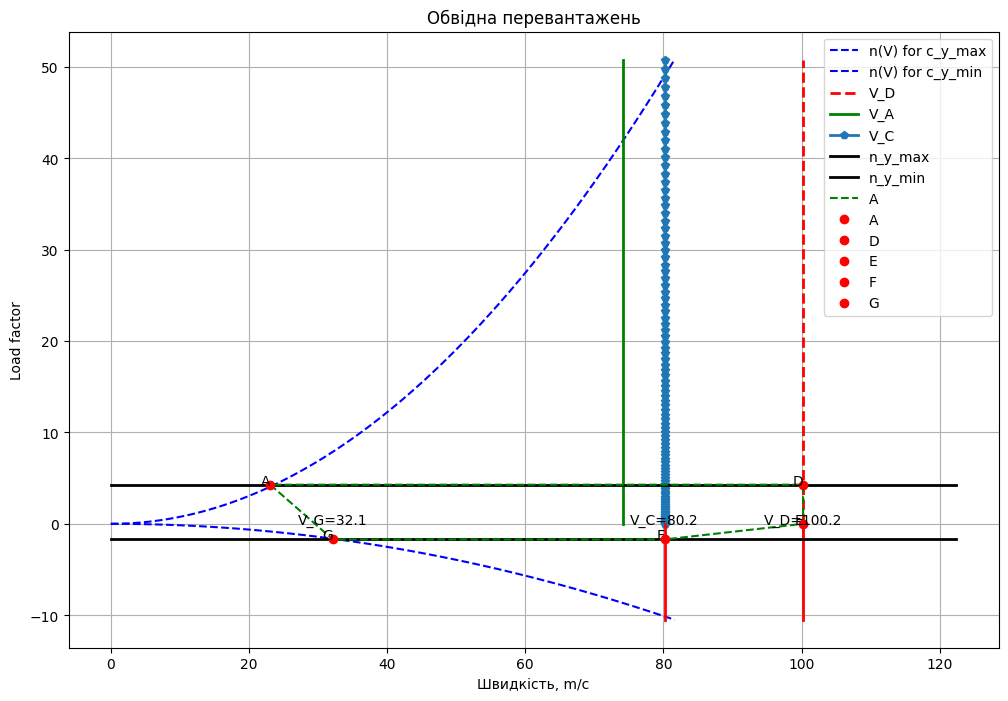

Характерні точки обвідної перевантажень:
A: V=23.1 м/с, n=4.28
D: V=100.2 м/с, n=4.28
E: V=100.2 м/с, n=0.00
G: V=32.1 м/с, n=-1.71

Таблиця 2.1.1 – До побудови огинаючої перевантажень при маневрі
------------------------------------------------------------
 Позначення  | Величина, км/год |   n_y    | α, град 
------------------------------------------------------------
    V_S      |      129.1       |   4.28   |    16   
    V_A      |      129.1       |  -1.71   |    16   
    V_C      |      267.1       |   4.28   |    16   
             |      288.7       |   4.28   |    16   
    V_D      |      288.7       |  -1.71   |    16   
             |      360.8       |   4.28   |    16   
    V_G      |      360.8       |  -1.71   |    16   
------------------------------------------------------------


In [68]:
import numpy as np  # Розраховуємо криві перевантажень
V = np.linspace(0, V_A*1.1, 100)
N_POS = []
N_NEG = []
VD_LIST = np.full(100, V_D)
VA_LIST = np.full(100, V_A)
VC_LIST = np.full(100, V_C)
n_y_max_list = np.full(100, params.n_y_max)
n_y_min_list = np.full(100, params.n_y_min)


# Побудова графіків
plt.figure(figsize=(12, 8))

for v in V:
    N_POS.append(fn.calculate_n_v_curve(v, params.c_y_max, params.G_max, params.S_kr, params.rho_0))# крива для cy_max
    N_NEG.append(fn.calculate_n_v_curve(v, params.c_y_min, params.G_max, params.S_kr, params.rho_0))  # крива для cy_min

# Позитивні перевантаження
plt.plot(V,N_POS, 'b--', label='n(V) for c_y_max')
    # Негативні перевантаження
plt.plot(V,N_NEG, 'b--', label='n(V) for c_y_min')

plt.plot(VD_LIST, N_POS,'r--', label='V_D', linewidth=2)
plt.plot(VD_LIST, N_NEG,'r-', linewidth=2)

plt.plot(VA_LIST, N_POS,'g-', label='V_A', linewidth=2)

plt.plot(VC_LIST, N_POS,'p-', label='V_C', linewidth=2)
plt.plot(VC_LIST, N_NEG,'r-',  linewidth=2)


plt.plot(V*1.5,n_y_max_list,'k-', label='n_y_max', linewidth=2)
plt.plot(V*1.5,n_y_min_list, 'k-', label='n_y_min', linewidth=2)

# Знаходимо точки перетину для VA (точка A)
idx_A = np.argwhere(np.diff(np.signbit(np.array(N_POS) - params.n_y_max))).flatten()
V_A_intersection = V[idx_A][0]

# Точка G
idx_G = np.argwhere(np.diff(np.signbit(np.array(N_NEG) - params.n_y_min))).flatten()
V_G_intersection = V[idx_G][0]

x = [V_A_intersection, V_G_intersection, V_C, V_D ,V_D,V_A_intersection]  # x coordinates
y = [params.n_y_max, params.n_y_min, params.n_y_min,0, params.n_y_max, params.n_y_max]  # y coordinates

plt.plot(x, y, 'g--', label='A')


# Додаємо точки на графік
plt.plot(V_A_intersection, params.n_y_max, 'ro', label='A')
plt.plot(V_D, params.n_y_max, 'ro', label='D')
plt.plot(V_D, 0, 'ro', label='E')
plt.plot(V_C, params.n_y_min, 'ro', label='F')
plt.plot(V_G_intersection, params.n_y_min, 'ro', label='G')

# Додаємо підписи характерних швидкостей
plt.text(V_C, 0, f'V_C={V_C:.1f}', horizontalalignment='center')
plt.text(V_D, 0, f'V_D={V_D:.1f}', horizontalalignment='center')

plt.text(V_G_intersection, 0, f'V_G={V_G_intersection:.1f}', horizontalalignment='center')

# Додаємо підписи точок
plt.text(V_A_intersection, params.n_y_max, 'A', horizontalalignment='right')
plt.text(V_D, params.n_y_max, 'D', horizontalalignment='right')
plt.text(V_D, 0, 'E', horizontalalignment='right')
plt.text(V_G_intersection, params.n_y_min, 'G', horizontalalignment='right')
plt.text(V_C, params.n_y_min, 'F', horizontalalignment='right')



plt.title('Обвідна перевантажень')
plt.xlabel('Швидкість, m/c')
plt.ylabel('Load factor')
plt.grid(True)
plt.legend()

plt.show()

print(f"Характерні точки обвідної перевантажень:")
print(f"A: V={V_A_intersection:.1f} м/с, n={params.n_y_max:.2f}")
print(f"D: V={V_D:.1f} м/с, n={params.n_y_max:.2f}")
print(f"E: V={V_D:.1f} м/с, n={0:.2f}")
print(f"G: V={V_G_intersection:.1f} м/с, n={params.n_y_min:.2f}")

# def create_maneuver_table(V_A, V_C, V_D, V_G, n_y_max, n_y_min):
#    """
#    Створює таблицю характерних точок обвідної перевантажень
#    """
#    # Формуємо дані для таблиці
#    data = {
#        "Позначення": ["V_S", "V_A", "V_C", "", "V_D", "", "V_G"],
#        "Величина, км/год": [
#            V_S * 3.6,
#            V_S * 3.6,
#            V_A * 3.6,
#            V_C * 3.6,
#            V_C * 3.6,
#            V_D * 3.6,
#            V_D * 3.6,
#            V_G * 3.6
#        ],
#        "n_y": [
#            n_y_max,
#            n_y_min,
#            n_y_max,
#            n_y_max,
#            n_y_min,
#              n_y_max,
#            n_y_min,
#             n_y_min
#        ]
#    }
#
#    # Знаходимо кути атаки для кожної точки
#    angles = []
#    for i in range(len(data["Позначення"])):
#        if data["n_y"][i] == 1:
#            # Для n_y = 1 шукаємо найближчий c_y до 1
#            closest_cy = min(params.alpha_cy.values(), key=lambda x: abs(x - 1))
#            angle = [k for k, v in params.alpha_cy.items() if v == closest_cy][0]
#        else:
#            # Для інших точок шукаємо відповідний кут атаки
#            required_cy = abs(data["n_y"][i])  # беремо модуль для від'ємних n_y
#            closest_cy = min(params.alpha_cy.values(), key=lambda x: abs(x - required_cy))
#            angle = [k for k, v in params.alpha_cy.items() if v == closest_cy][0]
#        angles.append(angle)
#
#    data["α, град"] = angles
#
#    # Виводимо таблицю
#    print("\nТаблиця 2.1.1 – До побудови огинаючої перевантажень при маневрі")
#    print("-" * 60)
#    print(f"{'Позначення':^12} | {'Величина, км/год':^16} | {'n_y':^8} | {'α, град':^8}")
#    print("-" * 60)
#
#    for i in range(len(data["Позначення"])):
#        print(f"{data['Позначення'][i]:^12} | {data['Величина, км/год'][i]:^16.1f} | {data['n_y'][i]:^8.2f} | {data['α, град'][i]:^8}")
#
#    print("-" * 60)
#
#    return data
def create_maneuver_table(V_A, V_C, V_D, V_G, n_y_max, n_y_min):
   """
   Створює таблицю характерних точок обвідної перевантажень
   """
   # Формуємо дані для таблиці
   data = {
       "Позначення": ["V_S", "V_A", "V_C", "", "V_D", "", "V_G"],
       "Величина, км/год": [
           V_S * 3.6,
           V_S * 3.6,
           V_A * 3.6,
           V_C * 3.6,
           V_C * 3.6,
           V_D * 3.6,
           V_D * 3.6,
           V_G * 3.6
       ],
       "n_y": [
           n_y_max,
           n_y_min,
           n_y_max,
           n_y_max,
           n_y_min,
             n_y_max,
           n_y_min,
            n_y_min
       ]
   }

   # Знаходимо кути атаки для кожної точки
   angles = []
   for i in range(len(data["Позначення"])):
       if data["n_y"][i] == 1:
           # Для n_y = 1 шукаємо найближчий c_y до 1
           closest_cy = min(params.alpha_cy.values(), key=lambda x: abs(x - 1))
           angle = [k for k, v in params.alpha_cy.items() if v == closest_cy][0]
       else:
           # Для інших точок шукаємо відповідний кут атаки
           required_cy = abs(data["n_y"][i])  # беремо модуль для від'ємних n_y
           closest_cy = min(params.alpha_cy.values(), key=lambda x: abs(x - required_cy))
           angle = [k for k, v in params.alpha_cy.items() if v == closest_cy][0]
       angles.append(angle)

   data["α, град"] = angles

   # Виводимо таблицю
   print("\nТаблиця 2.1.1 – До побудови огинаючої перевантажень при маневрі")
   print("-" * 60)
   print(f"{'Позначення':^12} | {'Величина, км/год':^16} | {'n_y':^8} | {'α, град':^8}")
   print("-" * 60)

   for i in range(len(data["Позначення"])):
       print(f"{data['Позначення'][i]:^12} | {data['Величина, км/год'][i]:^16.1f} | {data['n_y'][i]:^8.2f} | {data['α, град'][i]:^8}")

   print("-" * 60)

   return data
# Викликаємо функцію
table_data = create_maneuver_table(V_A, V_C, V_D, V_G_intersection, params.n_y_max, params.n_y_min)


Таблиця 2.1.2 – Розрахунок перевантажень при поривах повітря
--------------------------------------------------------------------------------
Висота (м) |    μ     |   k_g    |  n_y (V_C)   |  n_y (V_D)  
--------------------------------------------------------------------------------
    0      |  4.762   |  0.416   | +2.57 /-0.57 | +1.98 /0.02 
   5000    |  7.926   |  0.527   | +2.75 /-0.75 | +2.09 /-0.09


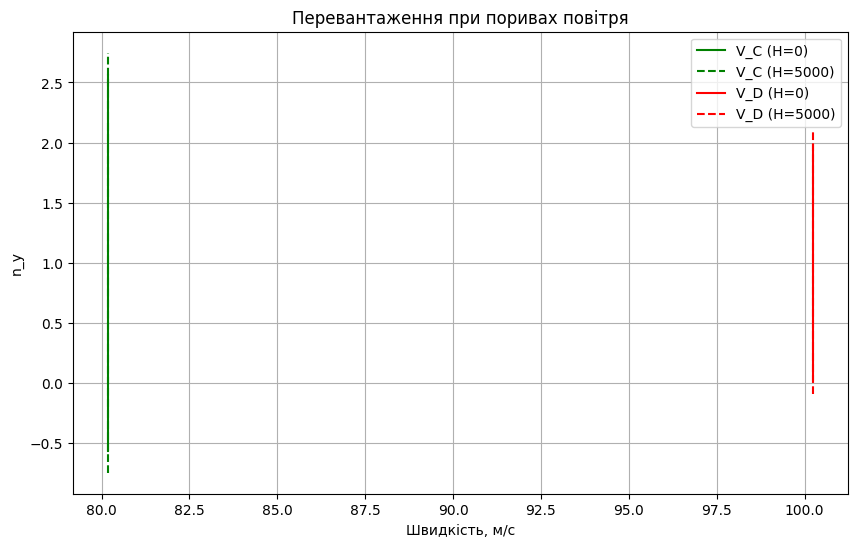

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from params import *
from fn import calculate_V

def calculate_gust_loads():

   # Висоти для розрахунку
   heights = [0, 5000]  # м

   # Швидкості поривів
   U_de = {
       "V_C": {0: 15.2, 5000: 13.4},  # м/с
       "V_D": {0: 7.6, 5000: 6.7}     # м/с
   }

   results = []
   c_y_alpha = fn.calculate_cy_alpha()
   b = fn.calculate_mean_aerodynamic_chord()
   for h in heights:
       rho_h = msa[h]["density"]

       # Розрахунок для V_C
       mu_C = (2 * G_max)/(S_kr * rho_h * b * g * c_y_alpha)
       k_g_C = 0.88 * mu_C/(5.3 + mu_C)
       n_C_pos = 1 + (k_g_C * U_de["V_C"][h] * c_y_alpha)/(16 * (G_max/S_kr)) * V_C
       n_C_neg = 1 - (k_g_C * U_de["V_C"][h] * c_y_alpha)/(16 * (G_max/S_kr)) * V_C

       # Розрахунок для V_D
       mu_D = mu_C  # Масовий параметр той самий
       k_g_D = k_g_C  # Коефіцієнт ослаблення той самий
       n_D_pos = 1 + (k_g_D * U_de["V_D"][h] * c_y_alpha)/(16 * (G_max/S_kr)) * V_D
       n_D_neg = 1 - (k_g_D * U_de["V_D"][h] * c_y_alpha)/(16 * (G_max/S_kr)) * V_D

       results.append({
           'height': h,
           'mu': mu_C,
           'k_g': k_g_C,
           'V_C': V_C,
           'V_D': V_D,
           'n_C_pos': n_C_pos,
           'n_C_neg': n_C_neg,
           'n_D_pos': n_D_pos,
           'n_D_neg': n_D_neg
       })

   # Створення таблиці
   print("\nТаблиця 2.1.2 – Розрахунок перевантажень при поривах повітря")
   print("-" * 80)
   print(f"{'Висота (м)':^10} | {'μ':^8} | {'k_g':^8} | {'n_y (V_C)':^12} | {'n_y (V_D)':^12}")
   print("-" * 80)

   for r in results:
       print(f"{r['height']:^10} | {r['mu']:^8.3f} | {r['k_g']:^8.3f} | "
             f"+{r['n_C_pos']:^5.2f}/{r['n_C_neg']:^5.2f} | "
             f"+{r['n_D_pos']:^5.2f}/{r['n_D_neg']:^5.2f}")

   # Побудова графіка
   plt.figure(figsize=(10, 6))

   # Точки для V_C
   plt.plot([V_C, V_C], [results[0]['n_C_neg'], results[0]['n_C_pos']], 'g-', label='V_C (H=0)')
   plt.plot([V_C, V_C], [results[1]['n_C_neg'], results[1]['n_C_pos']], 'g--', label='V_C (H=5000)')

   # Точки для V_D
   plt.plot([V_D, V_D], [results[0]['n_D_neg'], results[0]['n_D_pos']], 'r-', label='V_D (H=0)')
   plt.plot([V_D, V_D], [results[1]['n_D_neg'], results[1]['n_D_pos']], 'r--', label='V_D (H=5000)')

   plt.grid(True)
   plt.xlabel('Швидкість, м/с')
   plt.ylabel('n_y')
   plt.title('Перевантаження при поривах повітря')
   plt.legend()

   return results

# Виклик функції
gust_results = calculate_gust_loads()
plt.show()